In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Used for running on Google Colab - remove when running elsewhere
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Used when running on Google Colab - remove when running elsewhere
from pathlib import Path

# Load dataset - used when running on Google Colab - remove when running elsewhere
path_to_assignment_dir = Path("/content/drive/MyDrive/STAT 4243GU - Applied Data Science")
df = pd.read_csv(path_to_assignment_dir / "cleaned_selected_features.csv")

# Load dataset - used when running outside of Google Colab
# df = pd.read_csv("cleaned_selected_features.csv")

# Convert 'state' to categorical
df['state'] = df['state'].astype(str)

# Set Seaborn style
sns.set(style="whitegrid")

In [12]:
# Summary Statistics
print("Summary statistics for numerical columns:")
print(df.describe())

Summary statistics for numerical columns:
        PersPerFam  PctHousLess3BR  householdsize     NumIlleg  \
count  1665.000000     1665.000000    1665.000000  1665.000000   
mean      0.621718        0.318318       0.117857     0.017858   
std       0.188362        0.256281       0.137811     0.025867   
min       0.230000        0.000000       0.000000     0.000000   
25%       0.490000        0.000000       0.019609     0.000000   
50%       0.640000        0.500000       0.056634     0.009901   
75%       0.780000        0.500000       0.174474     0.019609   
max       0.910000        1.000000       0.465824     0.099266   

       PersPerRentOccHous  PctHousOwnOcc  PctWorkMomYoungKids  \
count         1665.000000    1665.000000          1665.000000   
mean             0.569033       0.553568             0.497231   
std              0.199624       0.187884             0.169901   
min              0.000000       0.000000             0.000000   
25%              0.440000       0.4400

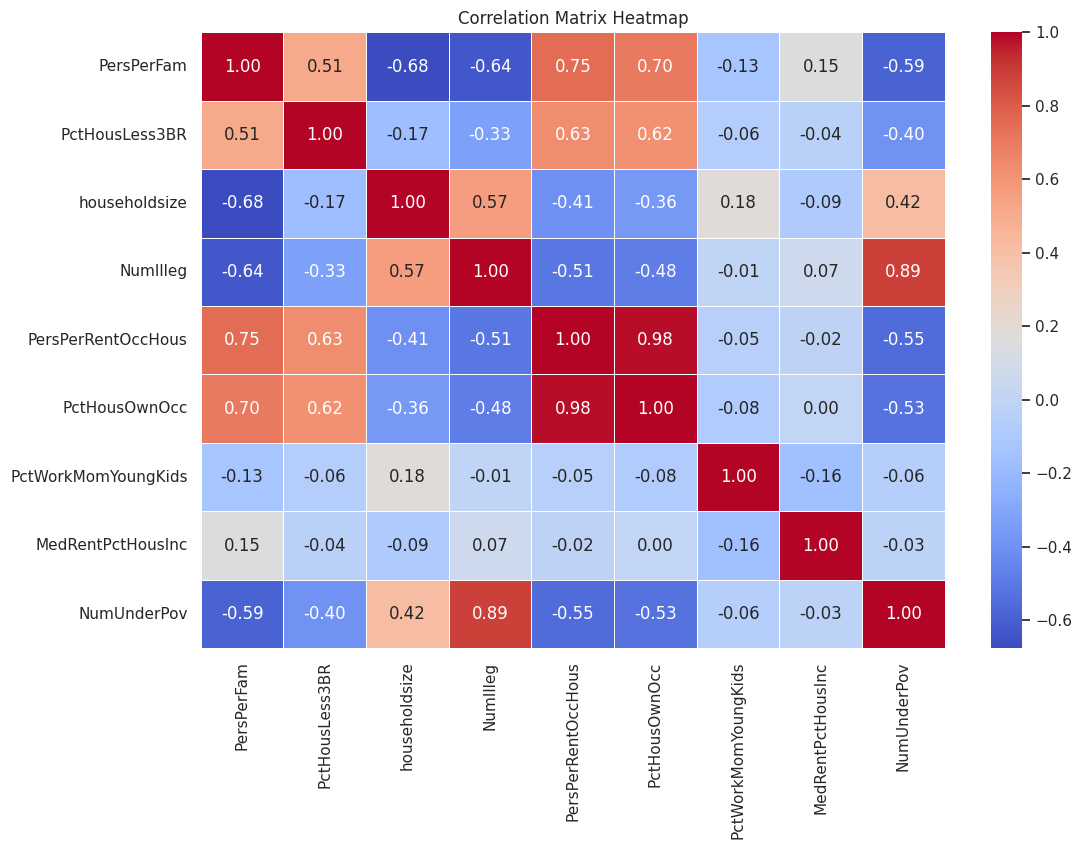

In [6]:
# Correlation Matrix & Heatmap
plt.figure(figsize=(12, 8))
corr = df.drop(columns=['state']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

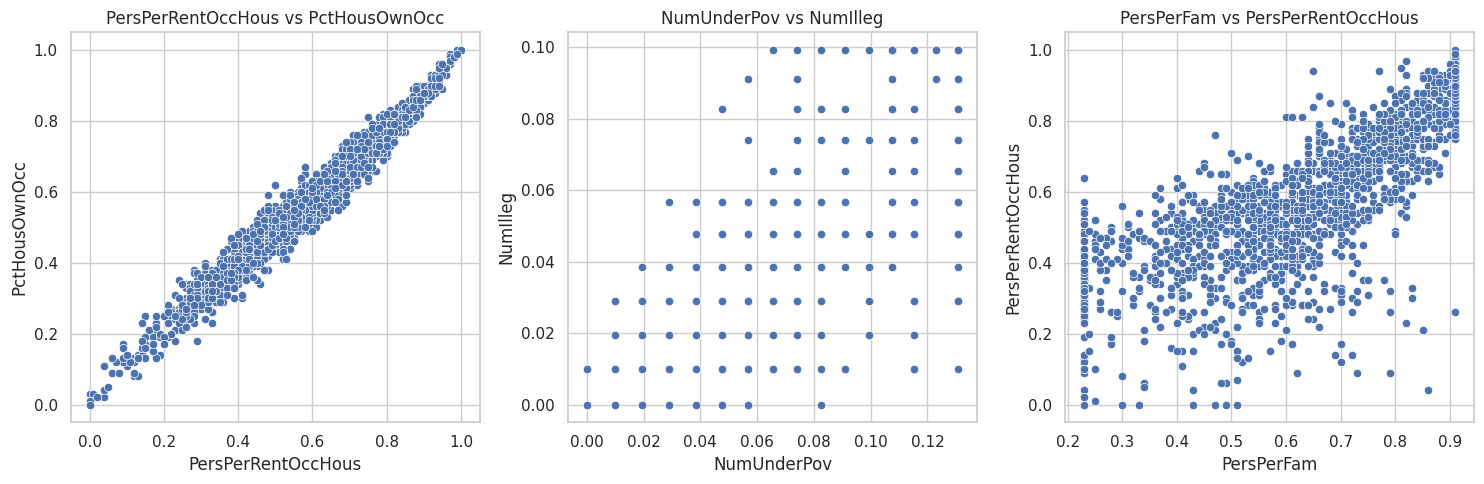

In [10]:
# Identify highly correlated feature pairs (absolute correlation > 0.5)
correlated_pairs = corr.abs().unstack().sort_values(ascending=False)
correlated_pairs = correlated_pairs[correlated_pairs < 1].drop_duplicates()
top_pairs = correlated_pairs[correlated_pairs > 0.5].index.tolist()

# Scatter Plots
plt.figure(figsize=(15, 5))
for i, (x_feature, y_feature) in enumerate(top_pairs[:3]):  # Select top 3 pairs
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[x_feature], y=df[y_feature])
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"{x_feature} vs {y_feature}")
plt.tight_layout()
plt.show()

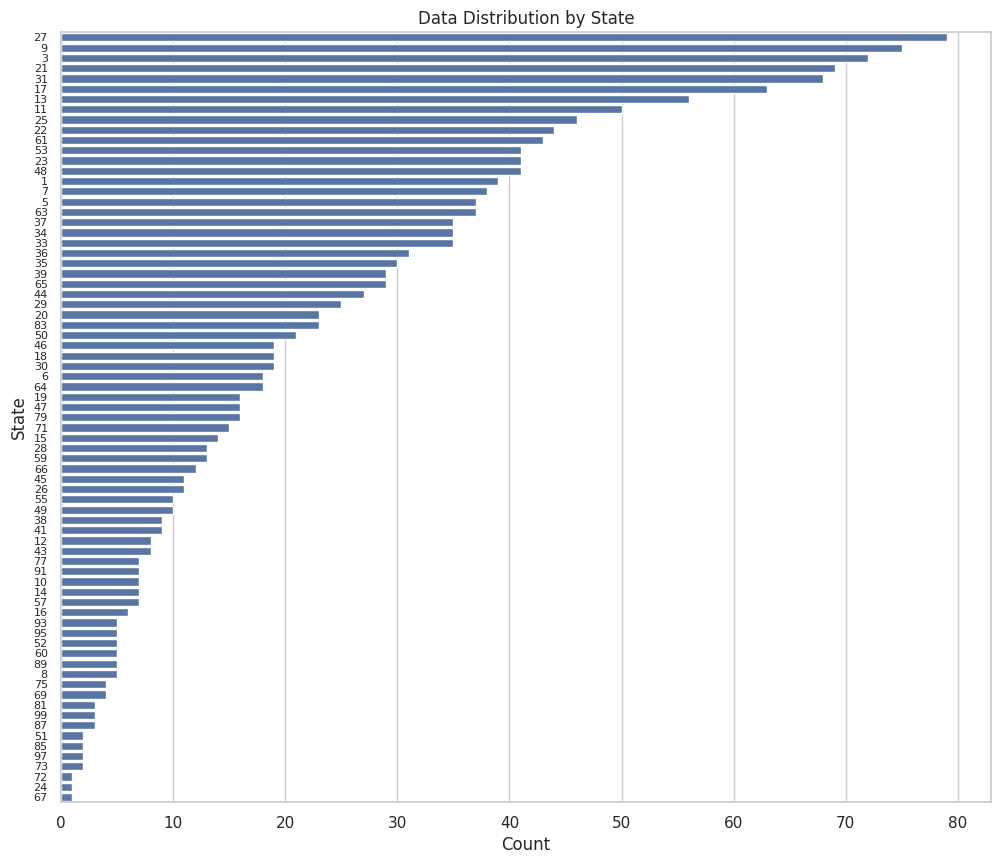

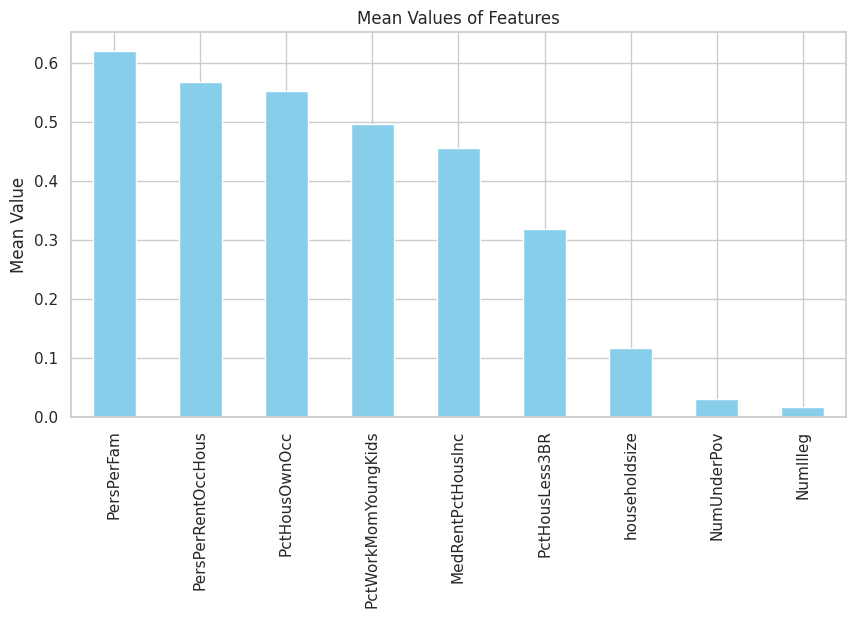

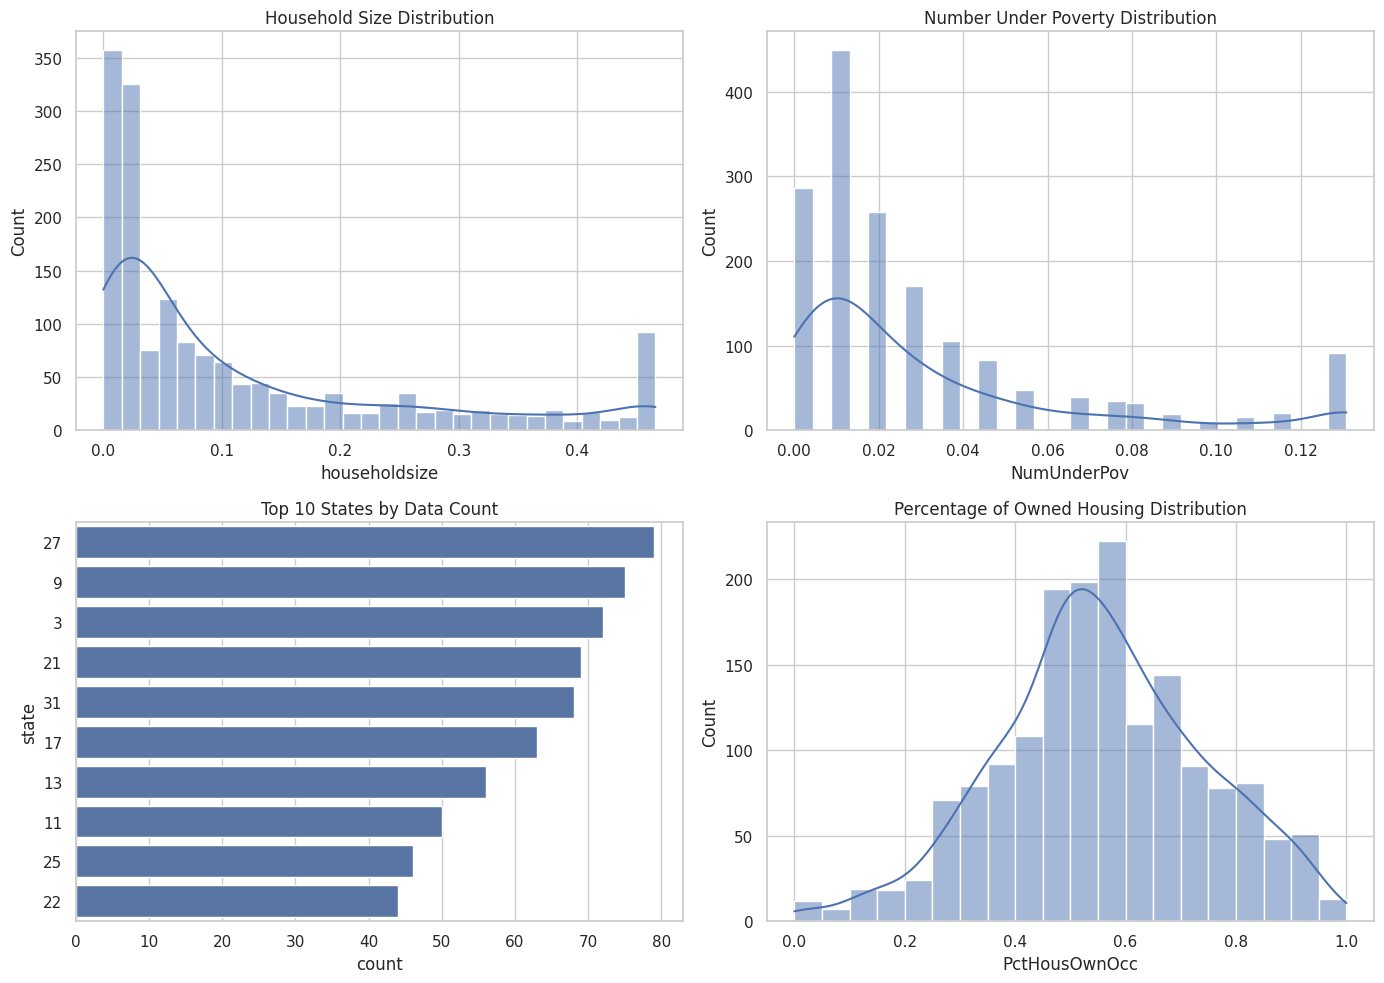

In [16]:
# Bar Charts

plt.figure(figsize=(12, 10))
sns.countplot(y=df['state'], order=df['state'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("State")
plt.title("Data Distribution by State")
plt.yticks(fontsize=8)
plt.show()

plt.figure(figsize=(10, 5))
feature_means = df.drop(columns=['state']).mean().sort_values(ascending=False)
feature_means.plot(kind='bar', color='skyblue')
plt.title("Mean Values of Features")
plt.ylabel("Mean Value")
plt.xticks(rotation=90)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram with KDE for numerical distribution
sns.histplot(df['householdsize'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Household Size Distribution")

sns.histplot(df['NumUnderPov'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Number Under Poverty Distribution")

# Categorical Feature Bar Charts
sns.countplot(y=df['state'], order=df['state'].value_counts().index[:10], ax=axes[1, 0])  # Show top 10 states only
axes[1, 0].set_title("Top 10 States by Data Count")

sns.histplot(df['PctHousOwnOcc'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Percentage of Owned Housing Distribution")

plt.tight_layout()
plt.show()